In [1]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from IPython.display import clear_output



plot_path = get_plotpath('comparison')
print(plot_path)
make_folders(plot_path)
fn_base = plot_path + '/prof_map_'
print(fn_base)

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/
/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison/
/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison//prof_map_


In [2]:
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map,plot_map_diff_only
from useful_scit.imps import (np, xr, plt, pd) 
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.plot.plot_profiles import plot_profile, set_legend_area_profs, set_scalar_formatter

# load and autoreload
from useful_scit.plot import get_cmap_dic
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/OAS-DEV/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib import gridspec

In [4]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2009-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [19]:
cases_sec = ['SECTv21_ctrl_koagD']
cases_orig =['noSECTv21_default_dd'] 
cases_orig2 =['noSECTv21_ox_ricc_dd']

cases = cases_orig + cases_sec
cases2 = cases_orig2 + cases_sec

## Combined plots

In [6]:
import cartopy.crs as ccrs

In [7]:
from sectional_v2.util.plot.colors import get_area_col
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sectional_v2.data_info import get_nice_name_case

In [8]:
linests = ['solid','dashed','dotted']

In [9]:
areas = ['Global','notLand','Amazonas and surroundings', 'Polar N','Polar S']

In [10]:
import seaborn as sns

In [11]:
        
def plot_prof_map_together(var, areas, cases, axs, var_map=None):
    if axs is None:
        fig = plt.figure(figsize = [width,asp_rat*width])
        gs = gridspec.GridSpec(2, 2,height_ratios=[1,1.], width_ratios=[5,1])#width_ratios=[2, 1]) 
        ax1 = plt.subplot(gs[1,0])
        ax2 = plt.subplot(gs[1,1])
        ax3 = plt.subplot(gs[0,:], projection=ccrs.Robinson())
        axs=[ax1,ax2,ax3]
        ax2.axis('off')
        cases_nn = [get_nice_name_case(case) for case in cases]
        
        set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    ax1 = axs[0]
    ax3 = axs[1]
    
    
    cmapd = get_cmap_dic(areas)
    
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    
    for area in areas:
        prof_dic = get_averaged_fields.get_profiles(cases,varl,startyear, endyear,area=area,
                                                  pressure_adjust=pressure_adjust)
    
        for case in cases:
            kwargs = dict(color=get_area_col(area), linestyle=linestd[case])
            plot_profile(prof_dic[case][var], 
                         ax=ax, 
                         kwargs=kwargs, 
                         xscale='log', 
                         label=case+', '+ area,
                         ylim=[1000,200])#, 
    ax.grid(False, which='both')
    sns.despine(ax=ax)
    ax.set_yscale('log')
    
    
    set_scalar_formatter(ax)
    
    # maps:
    if var_map is not None:
        var=var_map
    maps_dic = get_averaged_fields.get_maps_cases(cases,[var],startyear, endyear,
                                       avg_over_lev=avg_over_lev,
                                       pmin=pmin,
                                       pressure_adjust=pressure_adjust)
    plot_map_diff_only(var, cases, maps_dic, relative=True, cbar_equal=True,
                              kwargs_diff={}, axs=ax3, cmap_diff='RdBu_r', cbar_loc='under')
    
    
    #plt.tight_layout()
    return 

def plt_prof_map_together_ls(var1,var2, areas, cases, asp_rat=1, width=5.5, varl_map=None):
    nvars = 2
    fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
    gs = gridspec.GridSpec(2, nvars+1,height_ratios=[1,1.], width_ratios=[5,5,1])#width_ratios=[2, 1]) 
    axs_prof = []
    axs_maps = []
    ax1 = plt.subplot(gs[1,0])
    ax2 = None#plt.subplot(gs[1,1+i*2])
    ax3 = plt.subplot(gs[0,0], projection=ccrs.Robinson())
    print(var1,areas, cases, [ax1,ax3])
    if varl_map is None:
        var1m =None
        var2m =None
    else:
        var1m=varl_map[0]
        var2m=varl_map[1]
        
    plot_prof_map_together(var1, areas, cases, [ax1,ax3], var_map=var1m)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    ax1 = plt.subplot(gs[1,1])
    ax2 = plt.subplot(gs[1,2])
    ax3 = plt.subplot(gs[0,1], projection=ccrs.Robinson())
    plot_prof_map_together(var2, areas, cases, [ax1,ax3], var_map=var2m)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    
    
    ax2.axis('off')
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    cases_nn = [get_nice_name_case(case) for case in cases]
    
    set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    
    
    ax1.yaxis.set_ticklabels([])
    ax1.set_ylabel('')
    return fig, axs_maps, axs_prof

## N_AER

In [12]:
cases

['noSECTv21_default_dd', 'SECTv21_ctrl_koagD']

N_AER ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb3cd72be0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb30c78c50>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/N_AER_2008-01-2009-12.nc
Loa

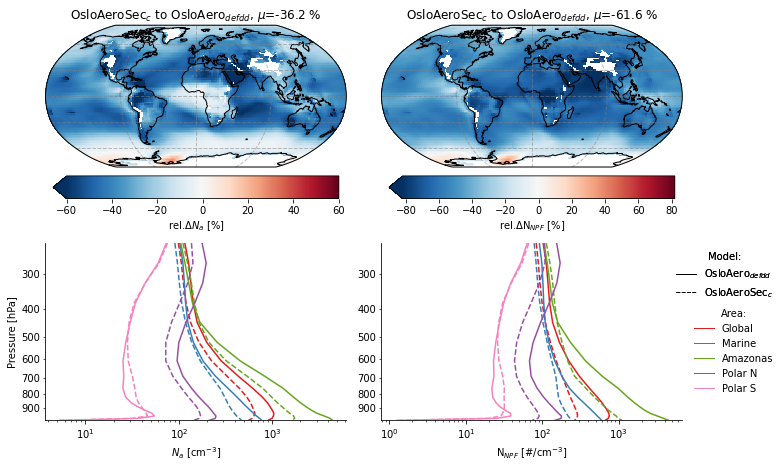

In [22]:
varl = ['N_AER','NCONC01']
cases_s = cases
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

N_AER ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb310564a8>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3c0810b8>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/N_AER_2008-01-2009-12.nc
Loa

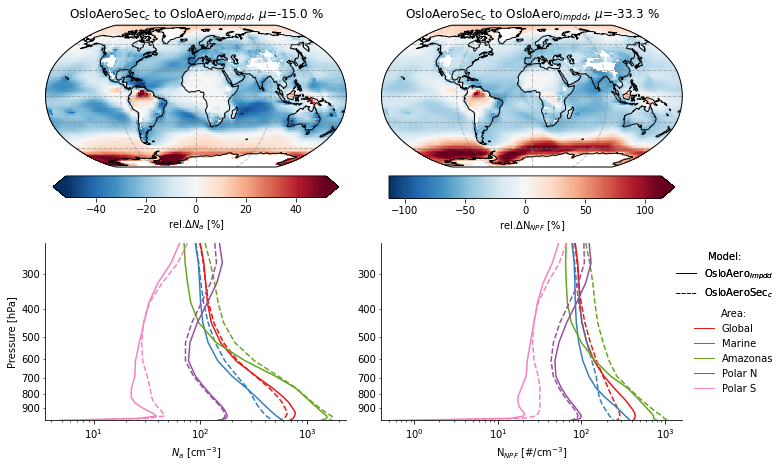

In [21]:
varl = ['N_AER','NCONC01']
cases_s = cases2
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## NA-mode

SOA_NA ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb30f6b7b8>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3d1ae470>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SOA_NA_2008-01-2009-12.nc
L

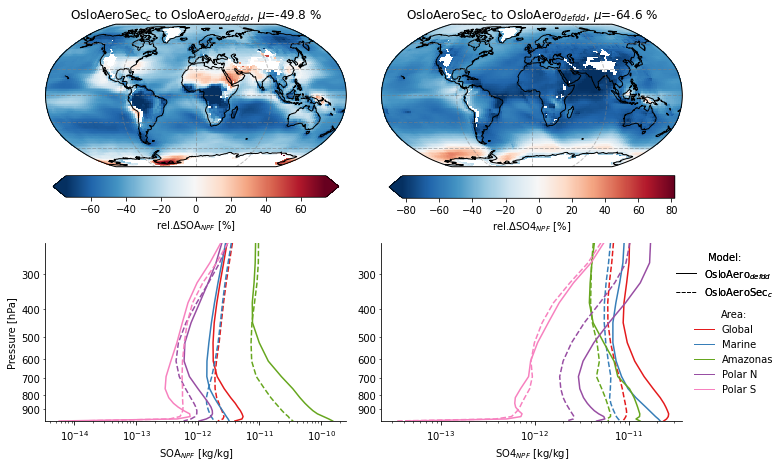

In [24]:
varl = ['SOA_NA','SO4_NA']
cases_s = cases
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

SOA_NA ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb310b8710>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3139ad30>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/SOA_NA_2008-01-2009-12.nc
L

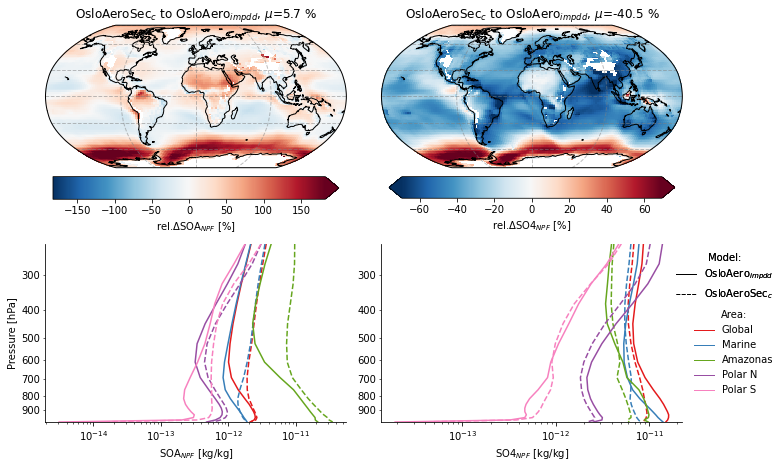

In [23]:
varl = ['SOA_NA','SO4_NA']
cases_s = cases2
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## AREL,AWNC

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb3c1d9828>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb30bb4630>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AREL_in

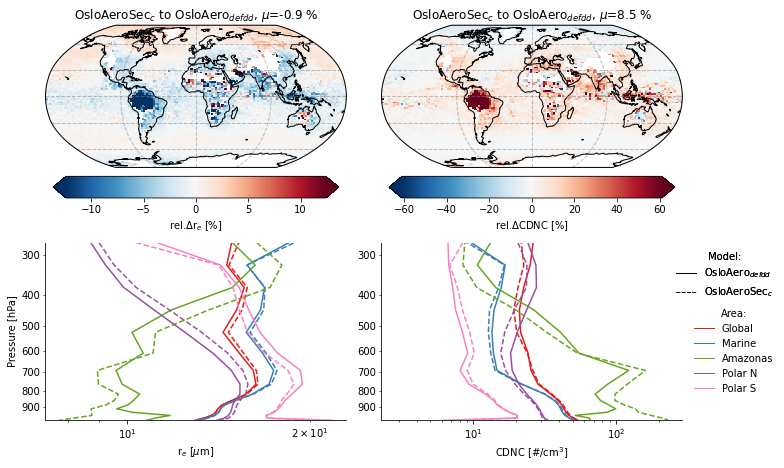

In [27]:
varl = ['AREL_incld','AWNC_incld']

cases_s = cases
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb3c1a8d30>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3cdf7e80>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/AREL_in

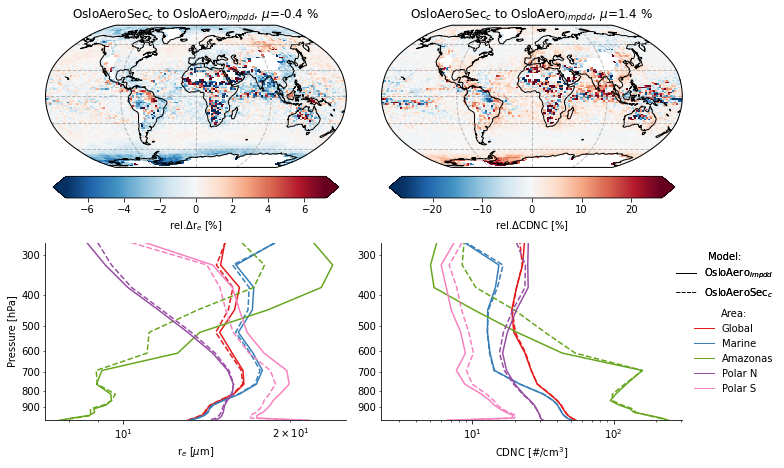

In [26]:
varl = ['AREL_incld','AWNC_incld']

cases_s = cases2
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## AREL,AWNC,ACTREL,ACTNL

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb36d6d2e8>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3c1bc3c8>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AREL_in

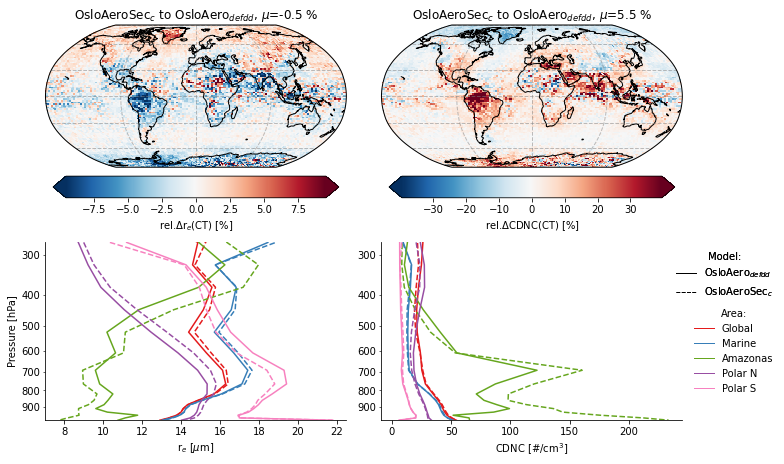

In [28]:
cases_s = cases
varl = ['AREL_incld','AWNC_incld']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
#fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_ox_ricc_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb3d0e2e48>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb3c1bfcc0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/AREL_in

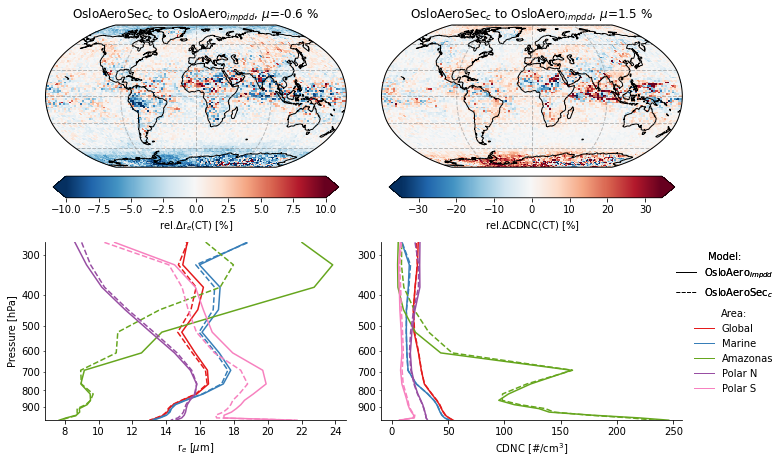

In [29]:
cases_s = cases2
varl = ['AREL_incld','AWNC_incld']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
#fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

FREQL ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb3cfce198>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcb301517f0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQL_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQI_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/FREQL_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/FREQI_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/FREQL_2008-01-2009-12.nc
Loading

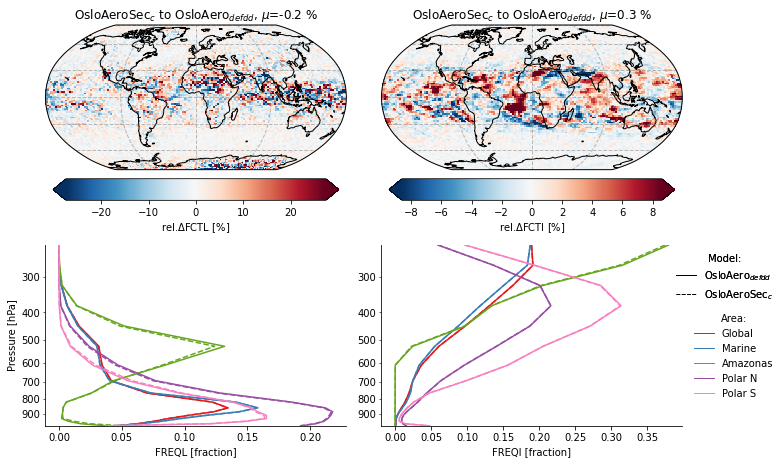

In [33]:
cases_s = cases
varl = ['FREQL','FREQI']
varl_maps=['FCTL','FCTI']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases_s, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
ca = '_'.join(cases_s)
fn_figure = '%s%s_%s_%s-%s.'%(fn_base,ca,vars_n,startyear, endyear)
#fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

# Other areas

In [ ]:
areas=['Global','landOnly','notLand', 'Polar N','Polar S']#,'Boreal forest']

In [ ]:
from sectional_v2.util.plot.plot_maps import make_box

## AREL,AWNC,ACTREL...

In [ ]:

varl = ['AREL_incld','AWNC_incld']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## FREQL,FREQI

In [ ]:

varl = ['FREQL','FREQI']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## N_AER, NCONC01

In [ ]:

varl = ['N_AER','NCONC01']
varl_maps=None#['ACTREL','ACTNL']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()